<a href="https://colab.research.google.com/github/ZikrullaRaxmatov/Zako_AI_Lessons/blob/main/MachineLearning_M2_2_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

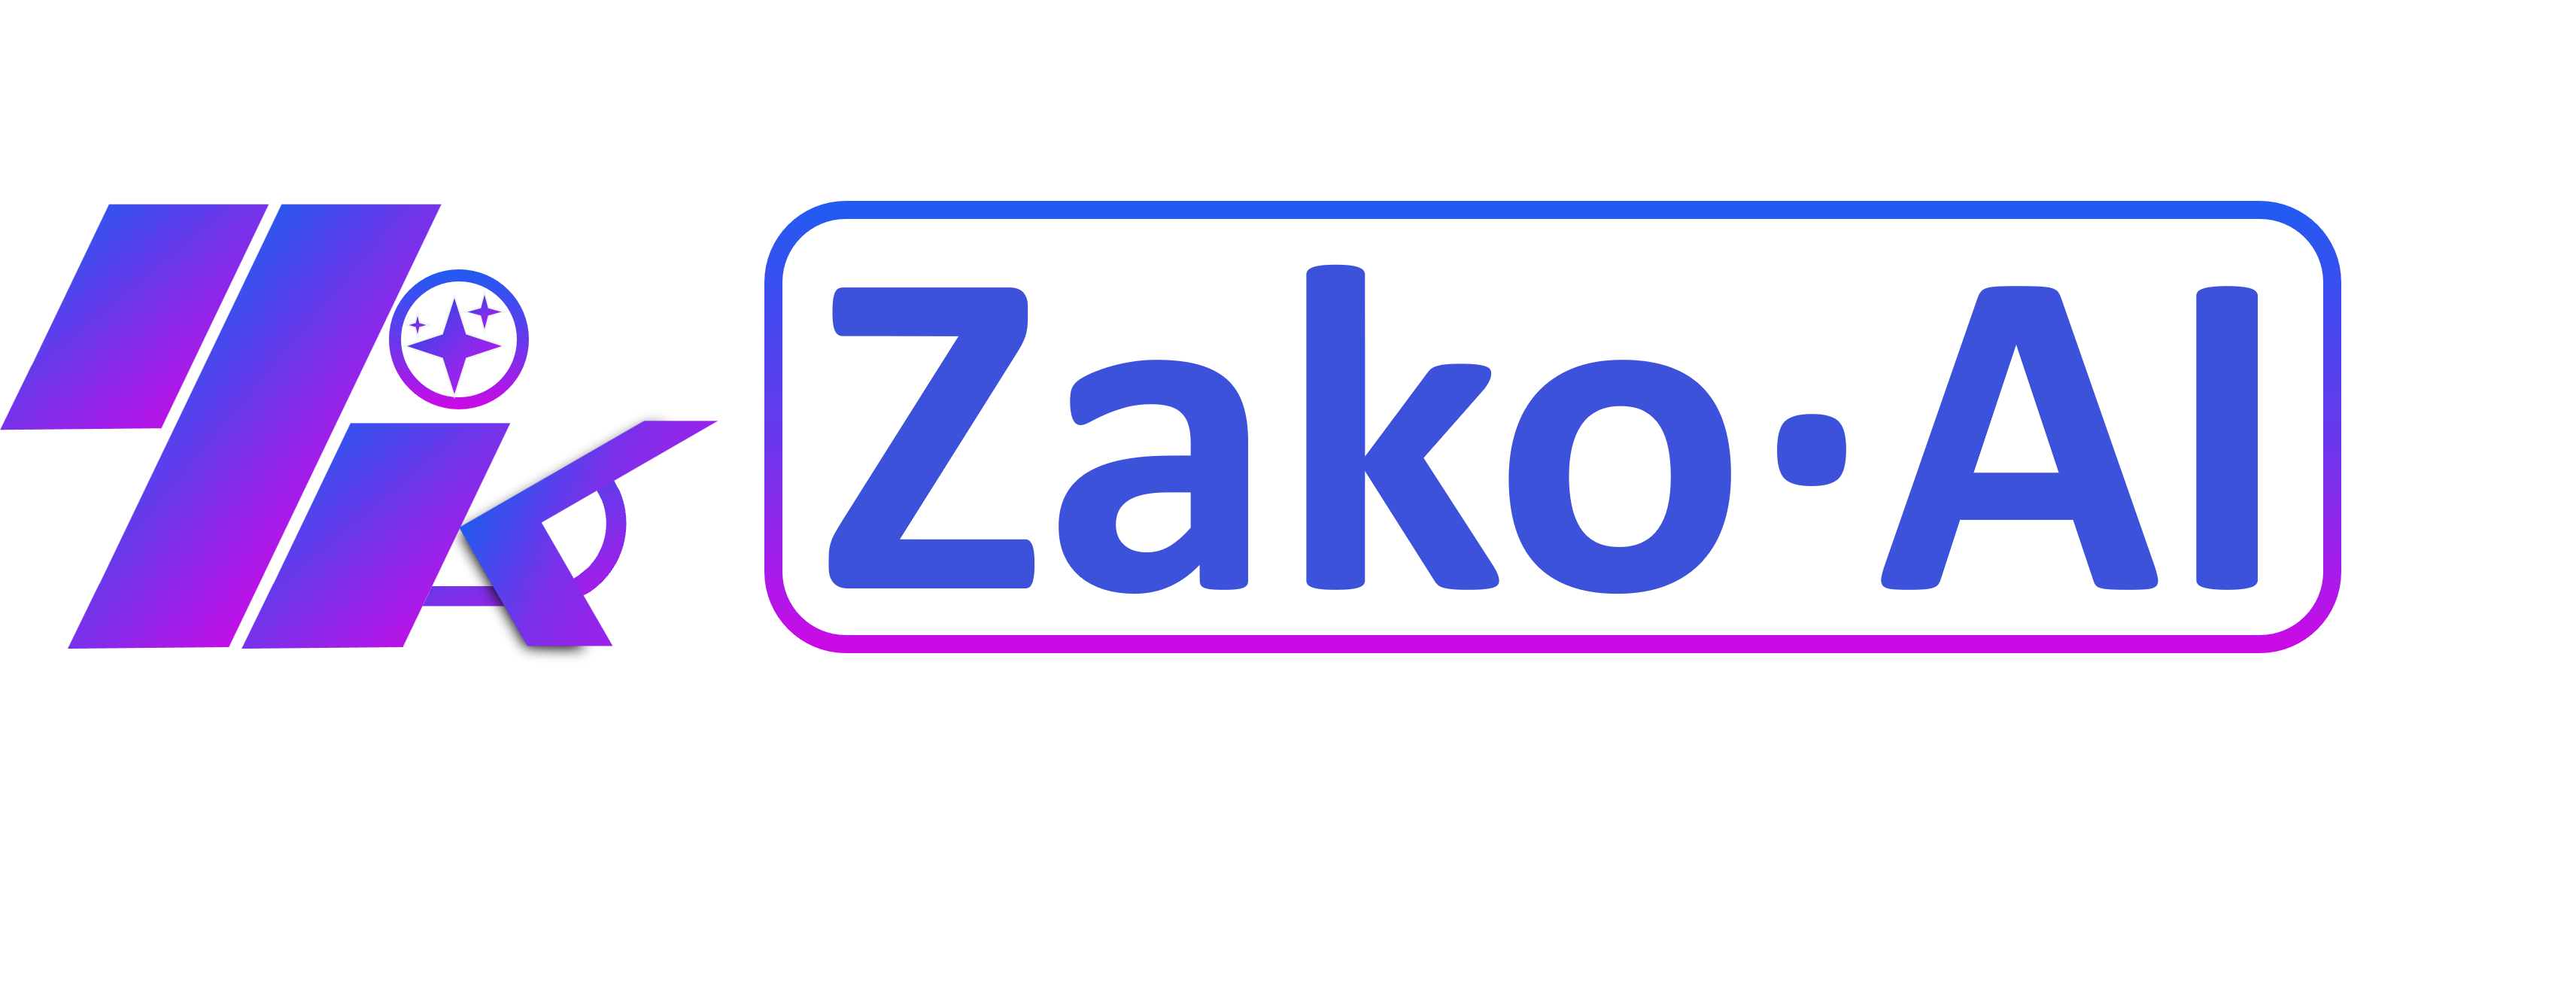

# Linear Regression (0 dan) scratchdan

## Datani normalizatsiya qilish shart, ammo biz bu yerda tashlab o'tib ketamiz

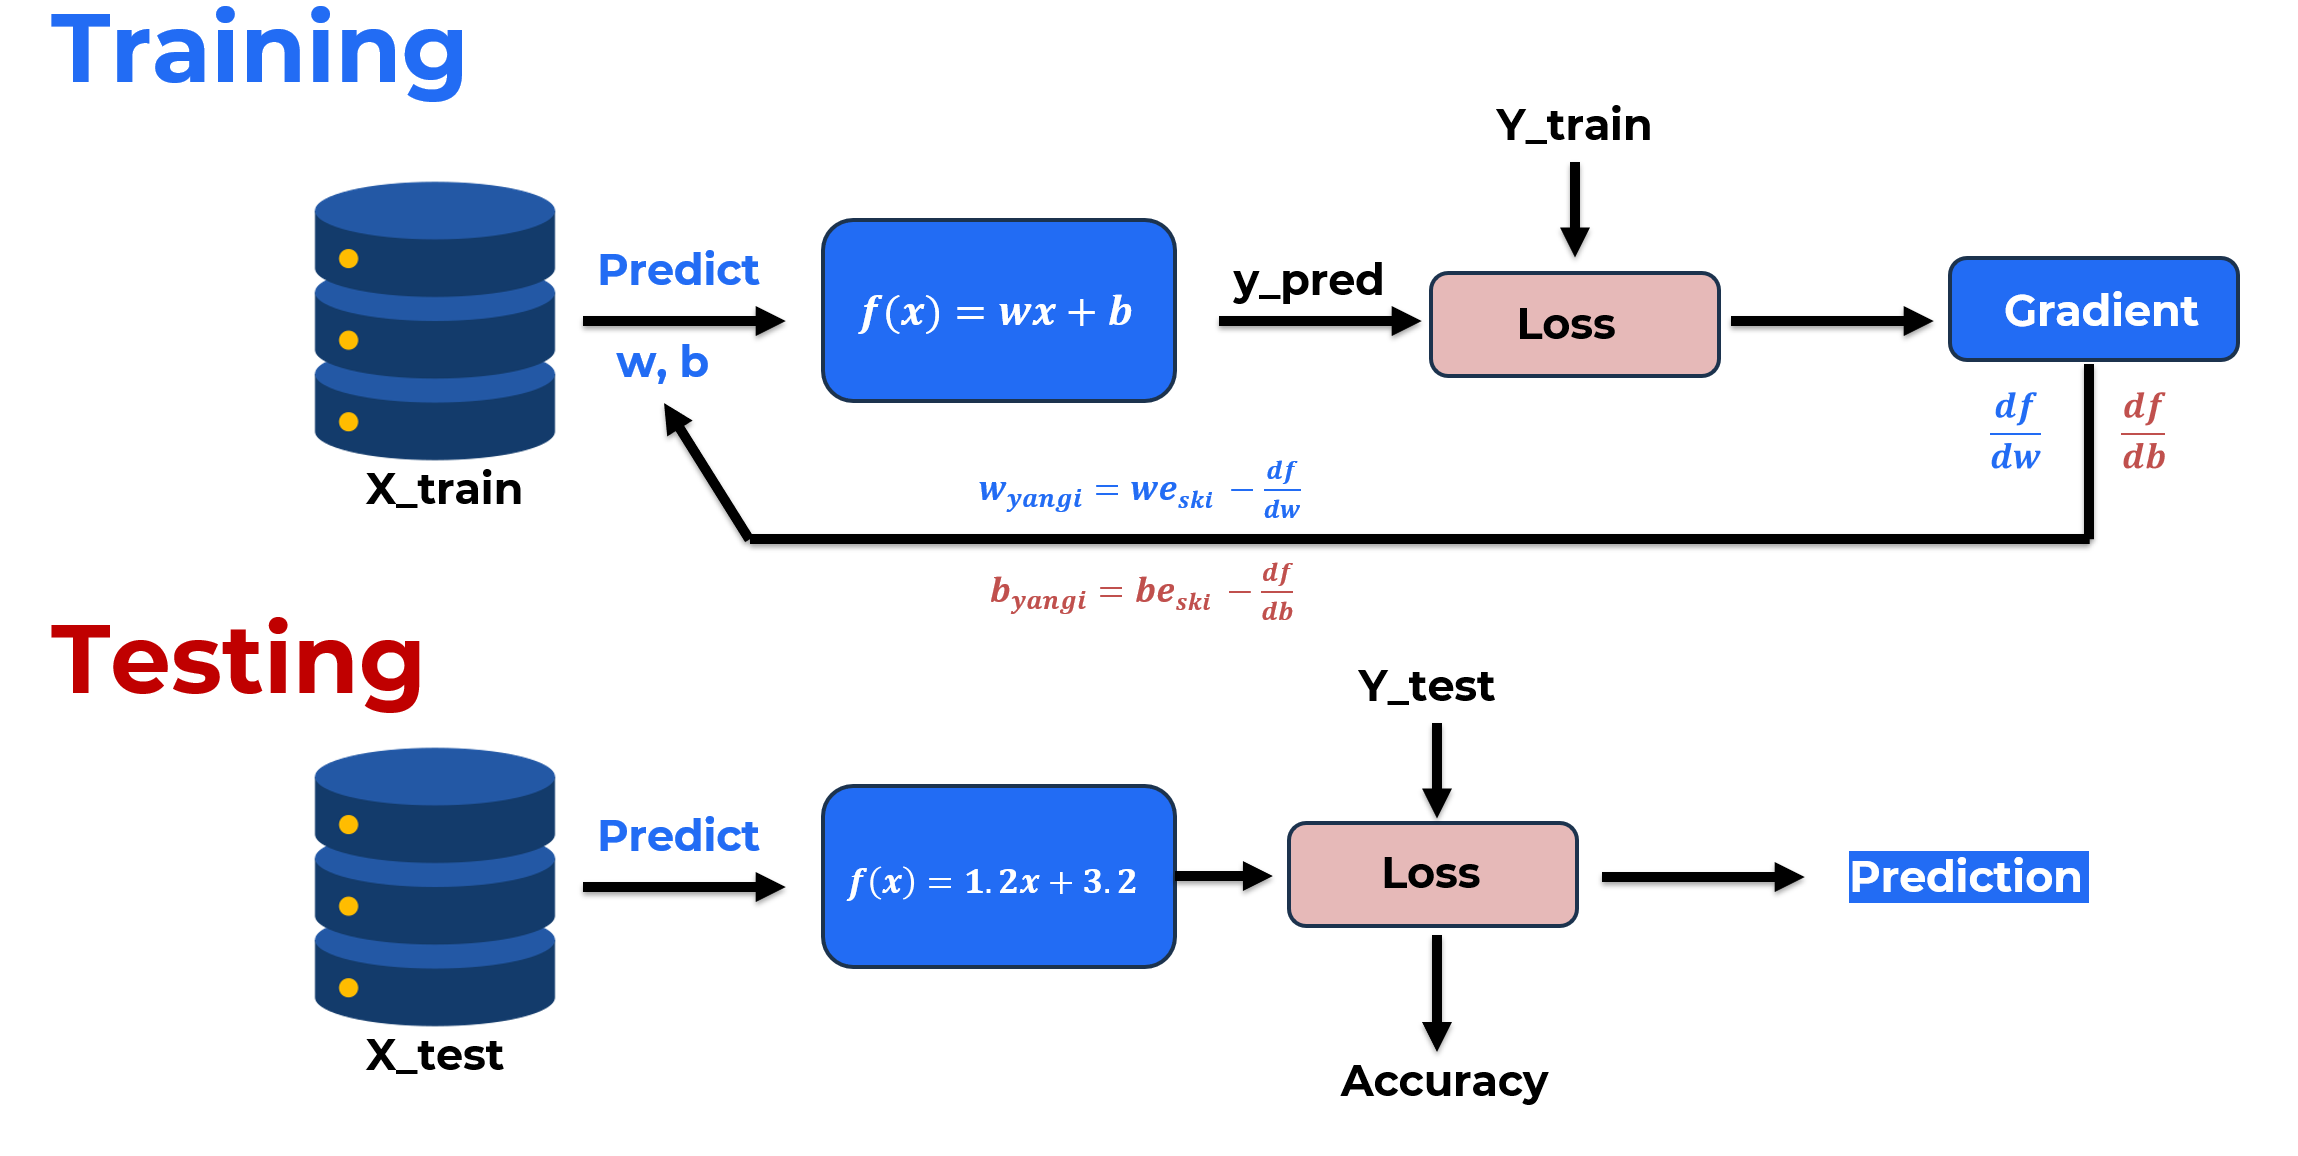

__

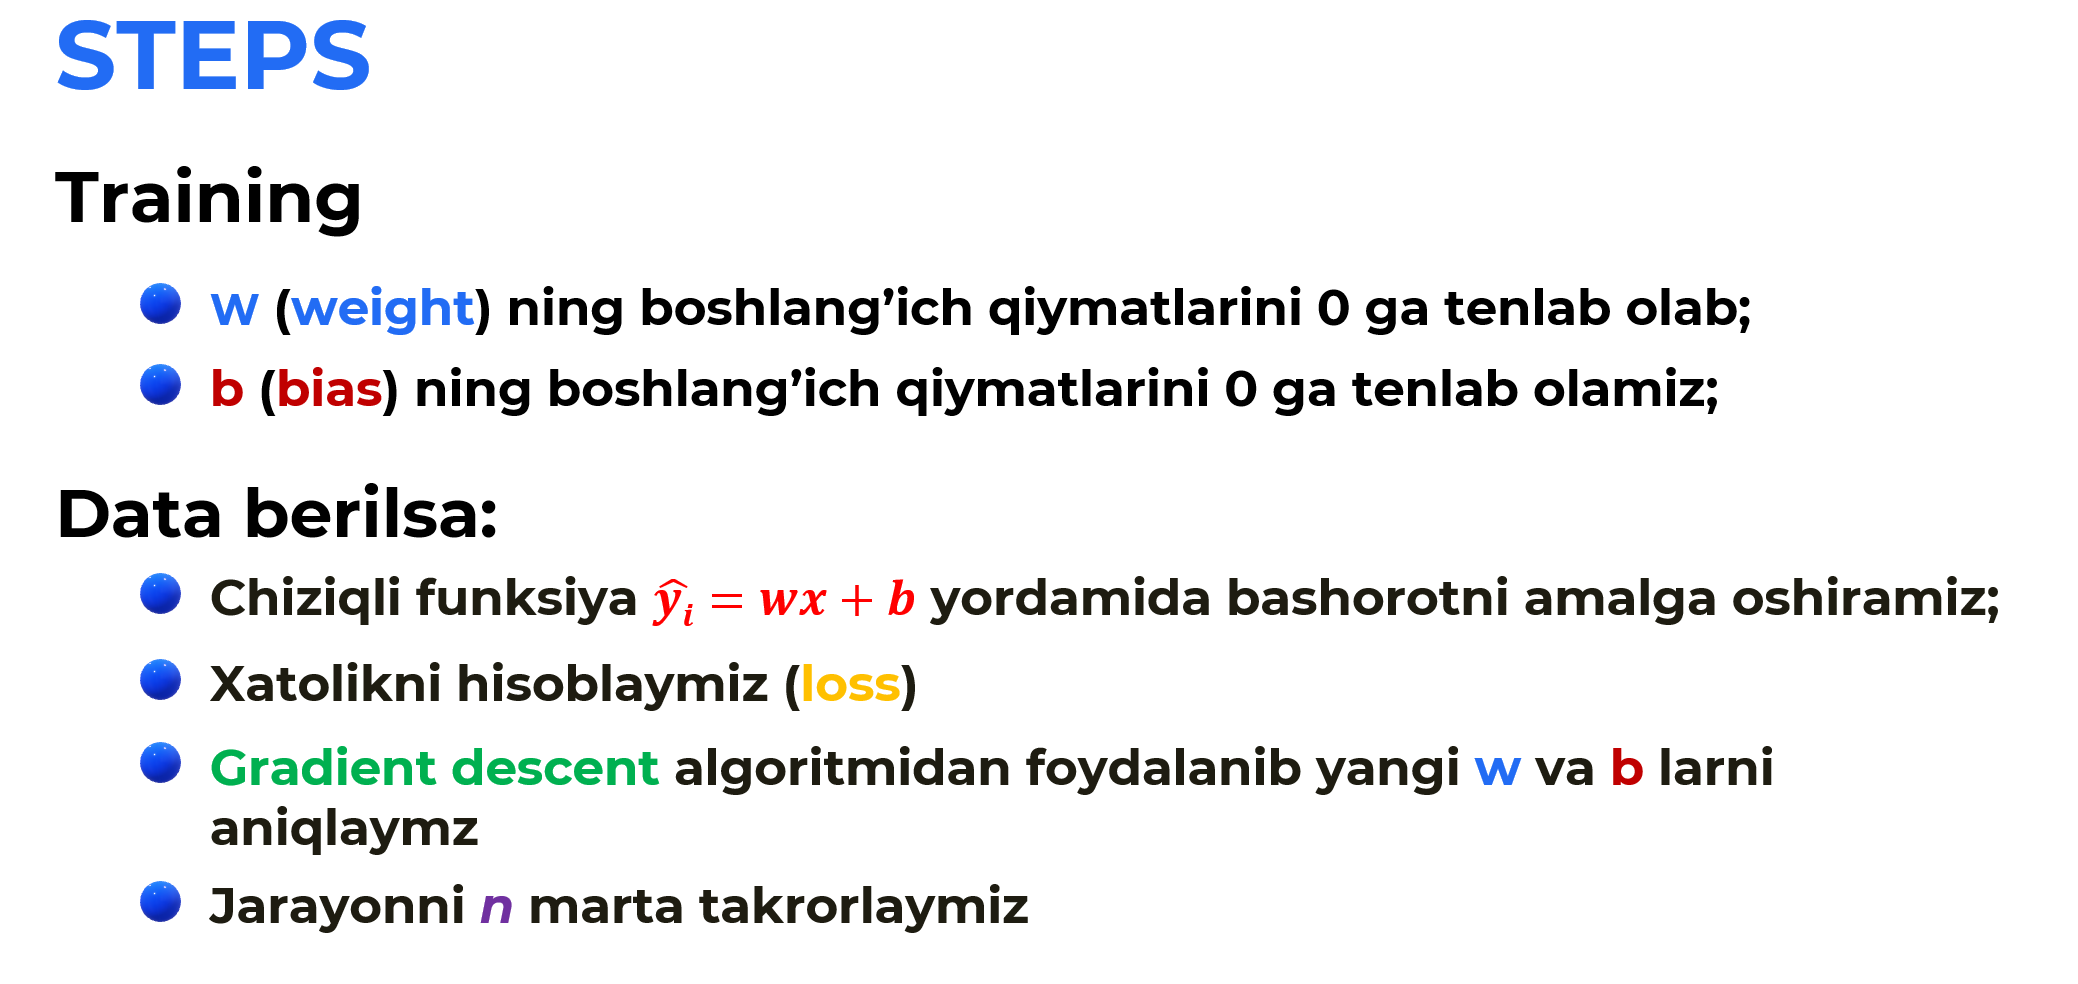

___

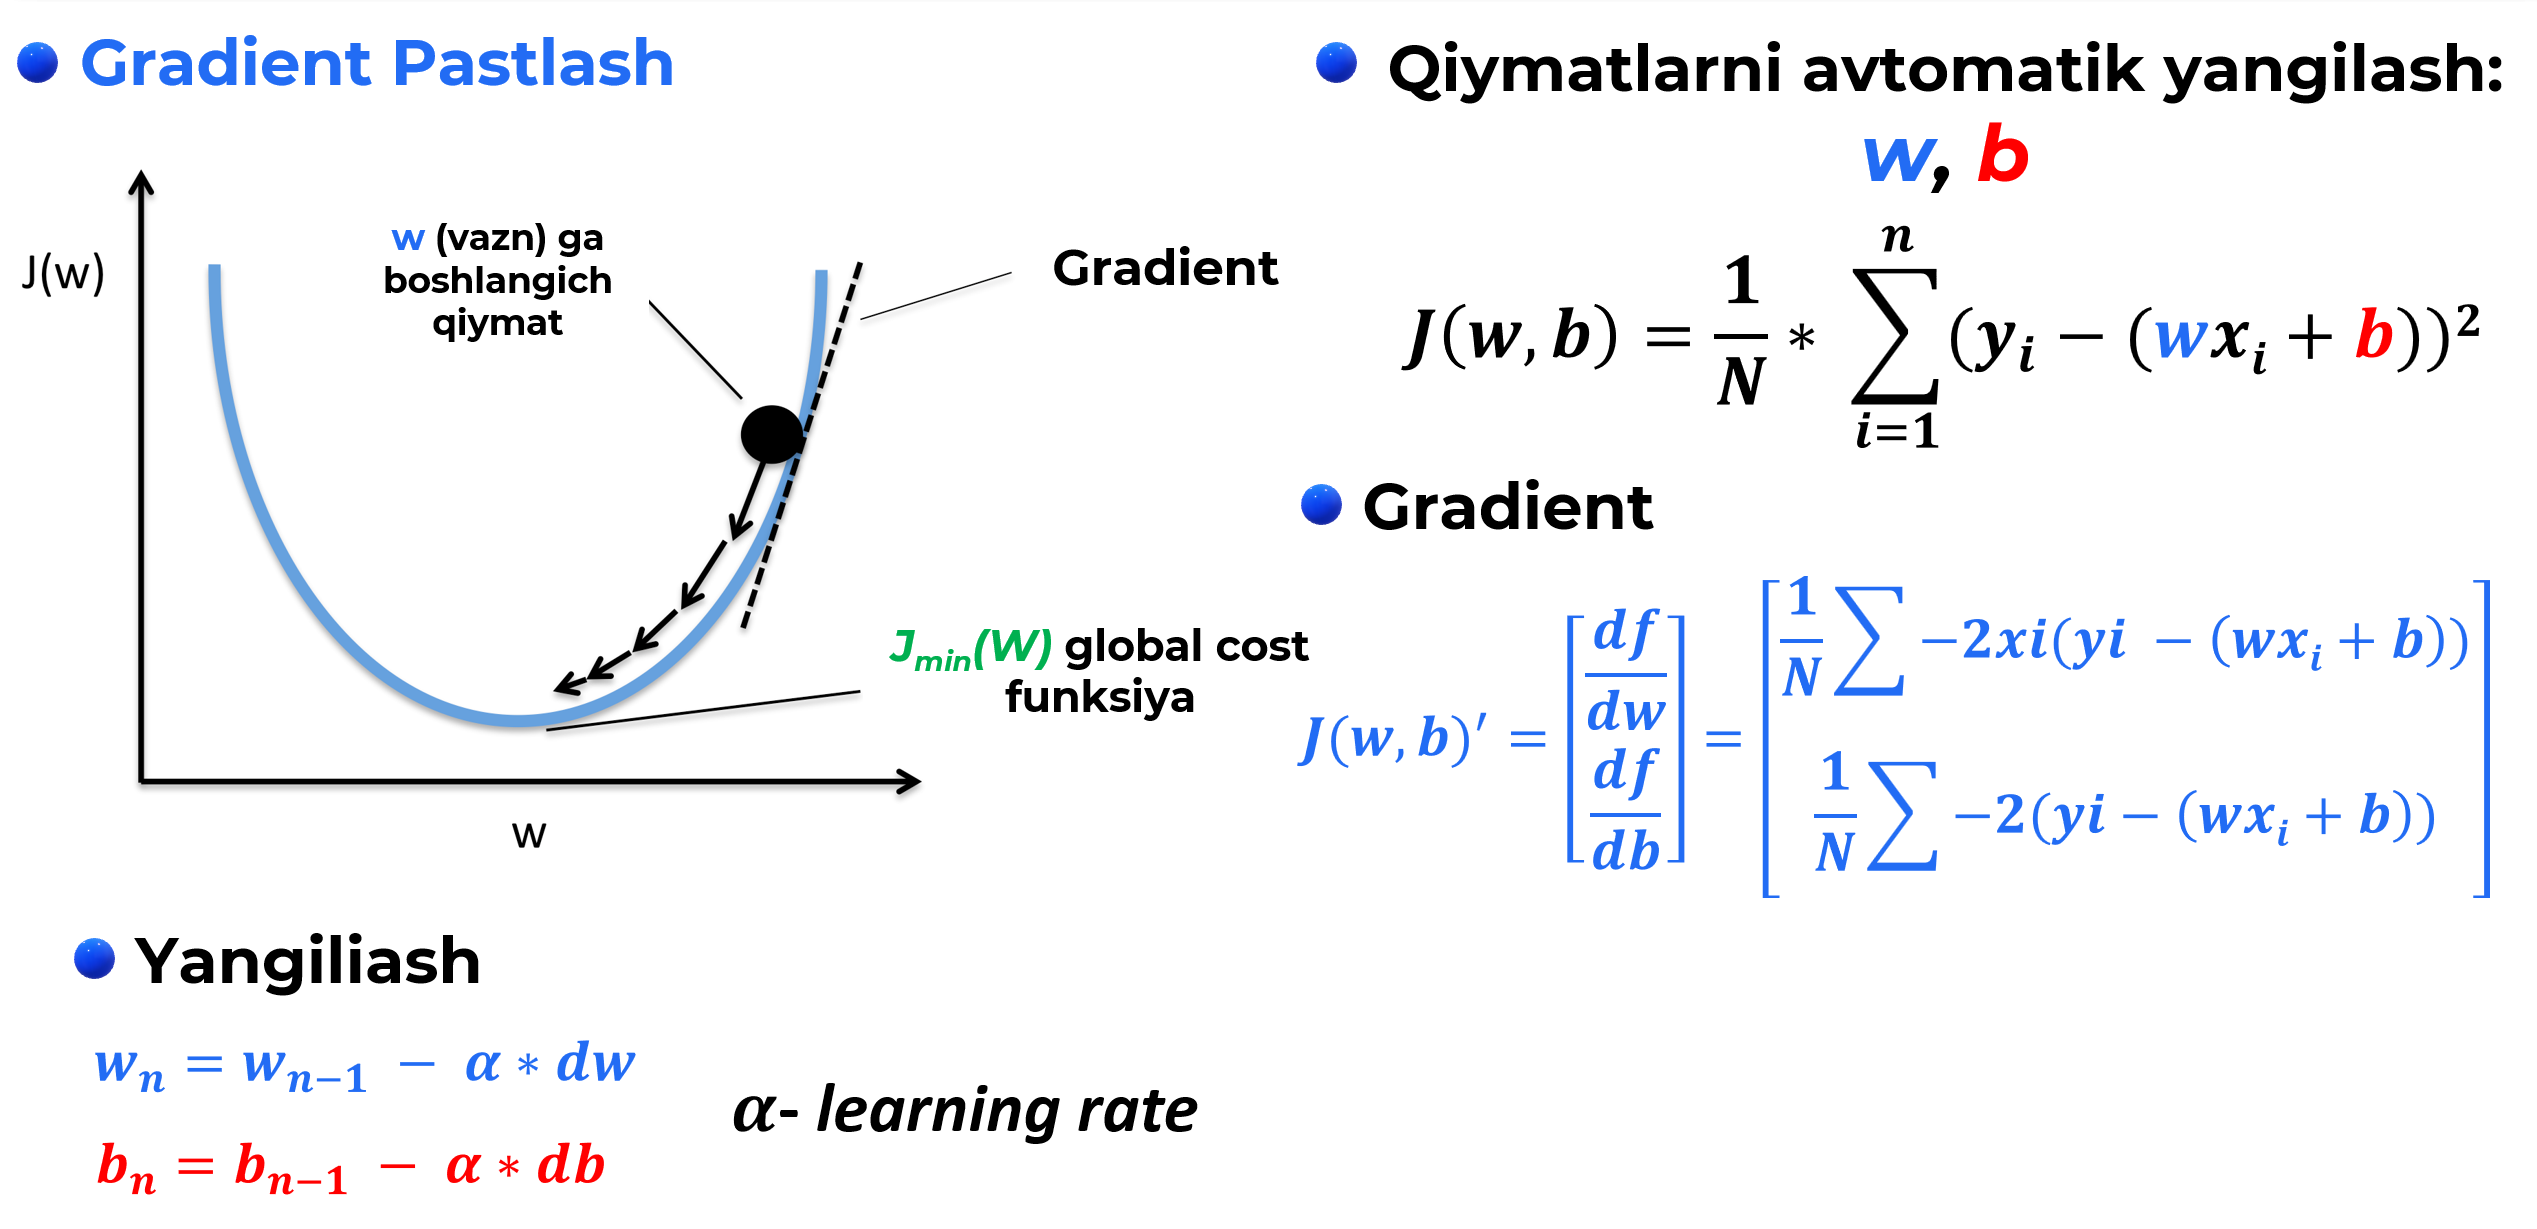

____

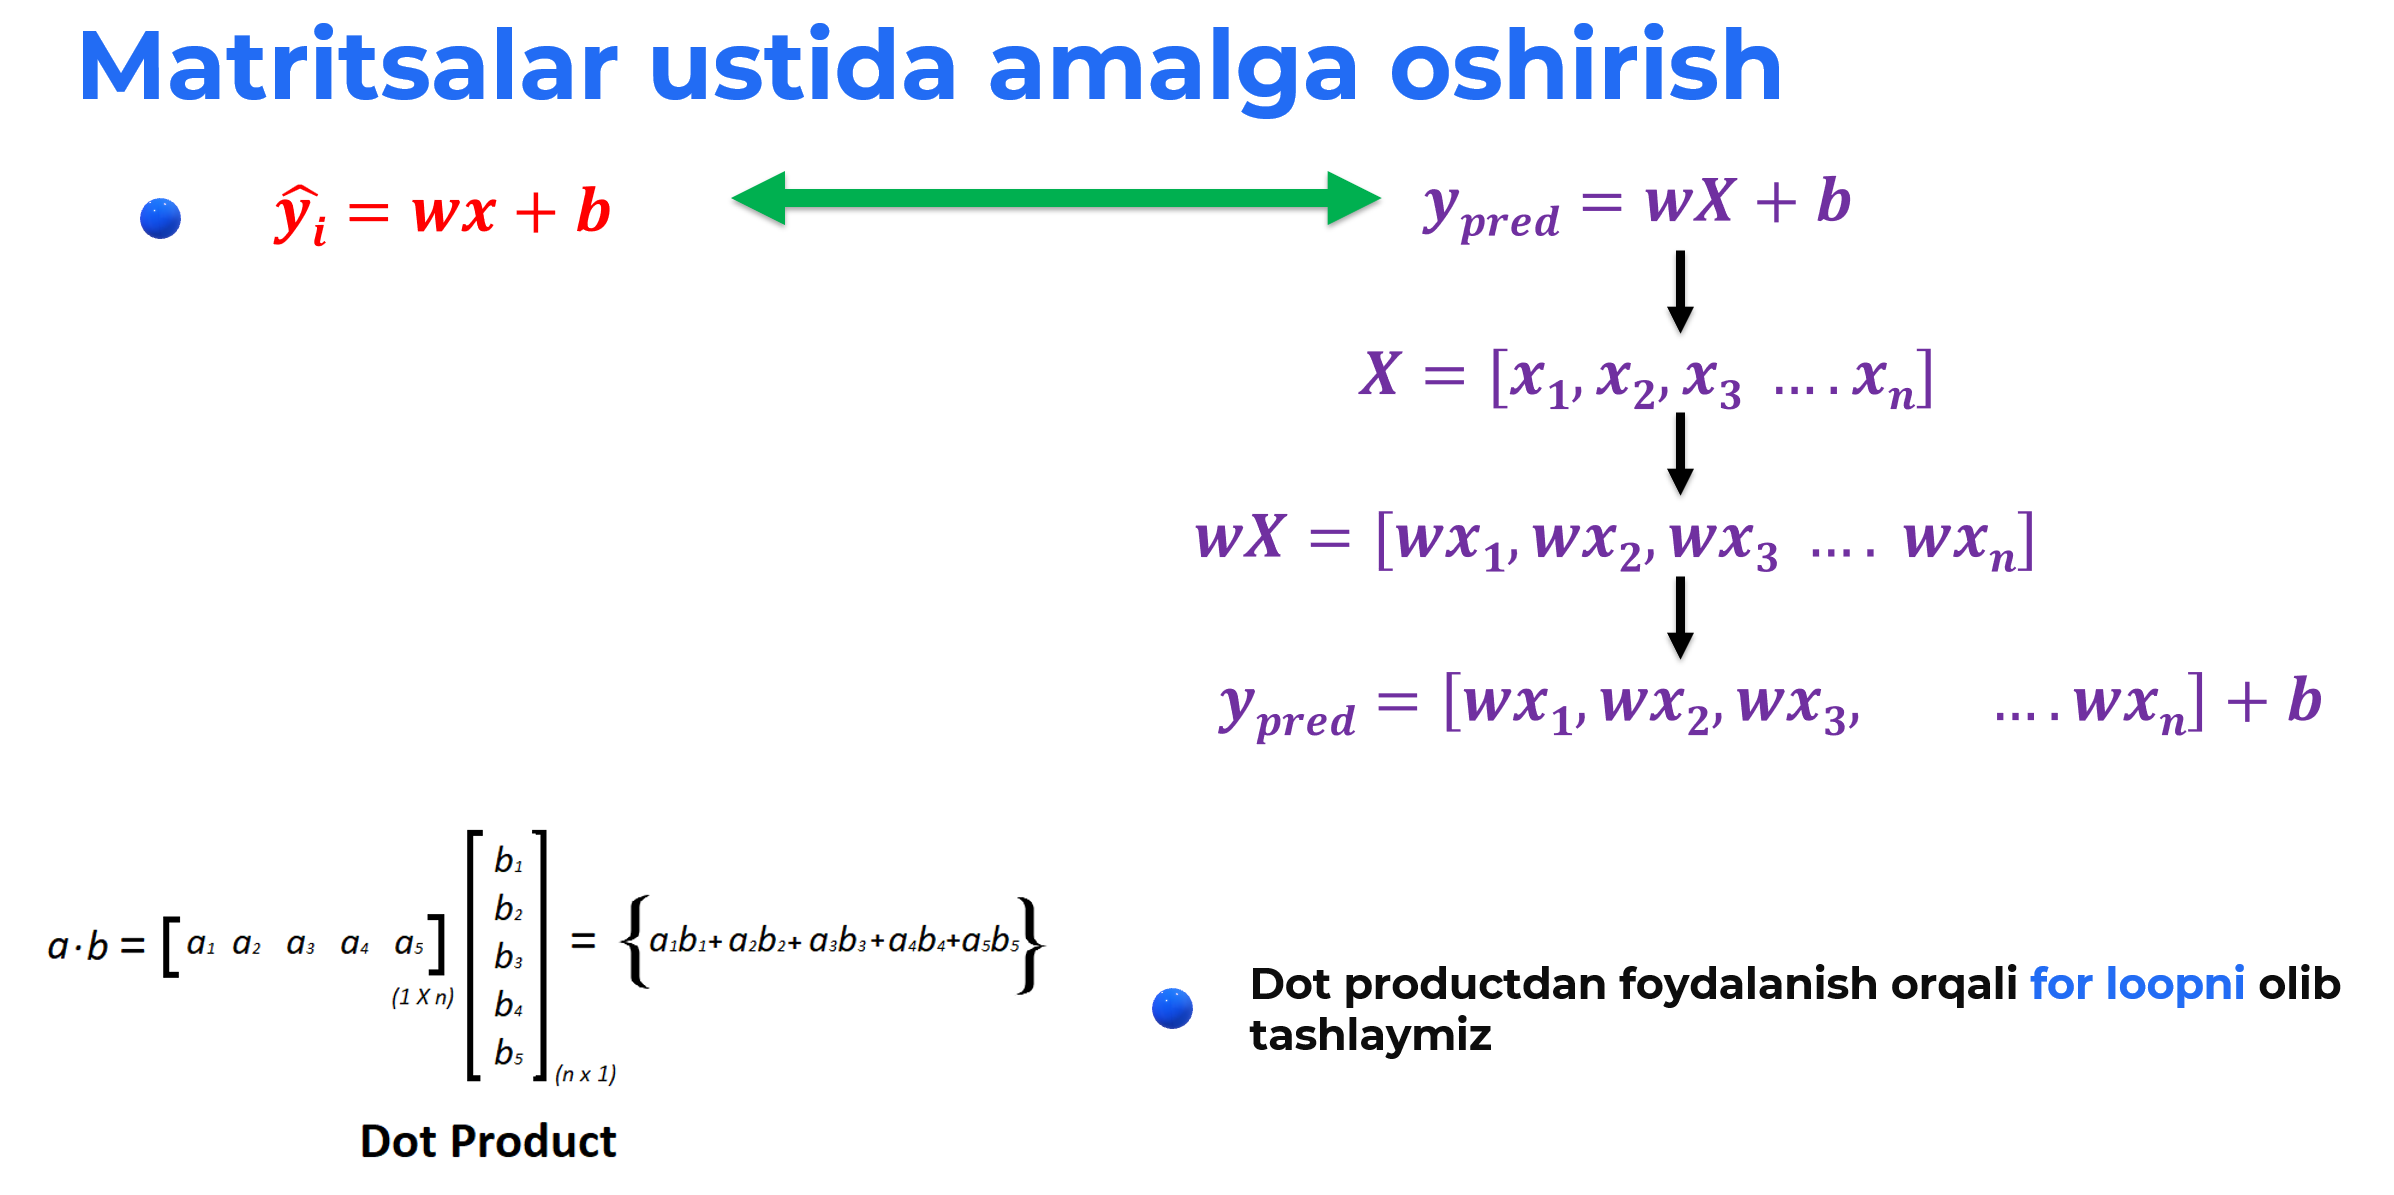

In [1]:
# Importing libraries
import numpy as np
import pandas as pd


In [62]:
# Creating a Linear Regression model
history_loss = []
class LinearRegressor:
  def __init__(self, lr = 0.001, n_iters = 1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    self.weights = np.zeros(n_features)
    self.bias = 0

    for i in np.arange(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias

      dw = (2/n_samples)*np.dot(X.T, (y-y_pred))
      db = (2/n_samples)*np.sum(y-y_pred)

      self.weights = self.weights + self.lr*dw
      self.bias = self.bias + self.lr*db
      mse = np.mean((y-y_pred)**2)
      print(f"Epoch: {i}")
      print(f"Loss: {mse}")
      history_loss.append(mse)

  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred


In [3]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

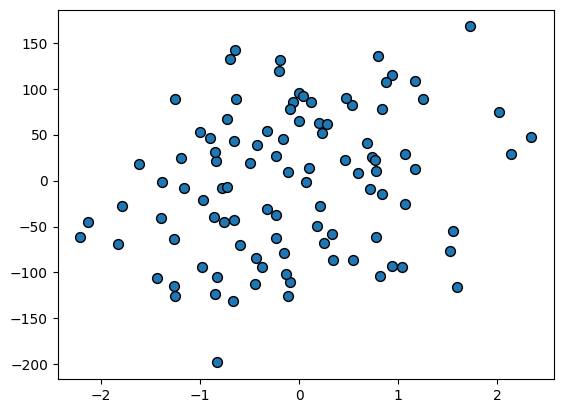

In [63]:
# Making dataset
X, y = datasets.make_regression(n_samples=100, n_features=2, noise=10, random_state=2025)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2025)

plt.figure()
plt.scatter(X[:, 1], y, edgecolors='k', s=50)
plt.show()

In [64]:
# Loading the model
from sklearn.metrics import mean_squared_error
lr = 0.01
iters = 1000

model = LinearRegressor(lr=lr, n_iters=iters)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

def mse(y_test, predictions):
  y_pred = np.mean((y_test-predictions)**2)
  return y_pred

acc = np.sum(predictions == y_test) / len(y_test)
print(f"MSE: {mse(y_test, predictions)}")
print(f"MSE2: {mean_squared_error(y_test, predictions)}")

Epoch: 0
Loss: 5630.639921074522
Epoch: 1
Loss: 5447.205310044231
Epoch: 2
Loss: 5269.95652357735
Epoch: 3
Loss: 5098.68057310574
Epoch: 4
Loss: 4933.171975843604
Epoch: 5
Loss: 4773.232483661199
Epoch: 6
Loss: 4618.670822000955
Epoch: 7
Loss: 4469.302438454916
Epoch: 8
Loss: 4324.949260637198
Epoch: 9
Loss: 4185.439462999381
Epoch: 10
Loss: 4050.6072422503944
Epoch: 11
Loss: 3920.2926010554993
Epoch: 12
Loss: 3794.341139701663
Epoch: 13
Loss: 3672.6038554285856
Epoch: 14
Loss: 3554.936949136347
Epoch: 15
Loss: 3441.201639191747
Epoch: 16
Loss: 3331.2639820661234
Epoch: 17
Loss: 3224.994699547753
Epoch: 18
Loss: 3122.2690122818067
Epoch: 19
Loss: 3022.966479400331
Epoch: 20
Loss: 2926.970844013863
Epoch: 21
Loss: 2834.1698843450436
Epoch: 22
Loss: 2744.4552702930314
Epoch: 23
Loss: 2657.7224252255974
Epoch: 24
Loss: 2573.870392803571
Epoch: 25
Loss: 2492.801708649778
Epoch: 26
Loss: 2414.4222766817875
Epoch: 27
Loss: 2338.641249934695
Epoch: 28
Loss: 2265.370915706785
Epoch: 29
Loss: 2

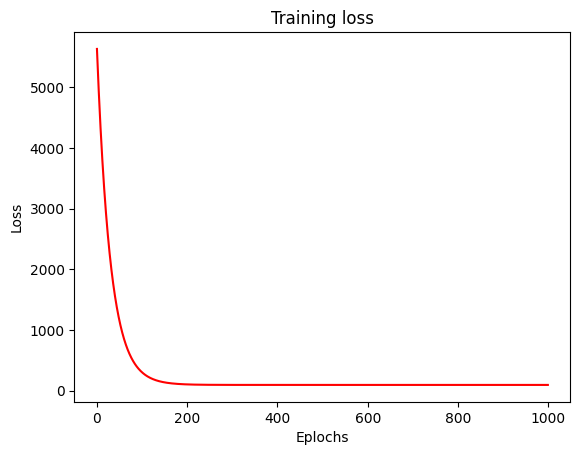

In [65]:
# Plotting the loss

plt.plot(history_loss, color='r')
plt.title('Training loss')
plt.xlabel('Eplochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Plotting the regressor line
range = np.linspace(-2, 2, 100) # for line plotting
reg_line = model.predict(range.reshape(-1, 2))
plt.plot(range, reg_line, color='red', linewidth=2, label=f'y=wx+b, lr={lr}, iters={iters}')
plt.scatter(X[:, 0], y, edgecolors='k', s=50)
plt.legend()
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train, y_train)
preds = model2.predict(X_test)

acc = np.sum(preds == y_test) / len(y_test)
print(f"MSE: {mse(y_test, preds)}")
print(f"MSE2: {mean_squared_error(y_test, preds)}")

MSE: 74.63326827167725
MSE2: 74.63326827167725
